In [1]:
# check version
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Fashion-MNIST

See <a href="https://www.tensorflow.org/tutorials/keras/classification">Basic classification: Classify images of clothing</a>

Load and prepare dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train, X_valid = train_images[:40000], train_images[40000:]
y_train, y_valid = train_labels[:40000], train_labels[40000:]

In [5]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [6]:
print('Train      : ', X_train.shape)
print('Validation : ', X_valid.shape)
print('Test       : ', X_test.shape)

Train      :  (40000, 28, 28)
Validation :  (20000, 28, 28)
Test       :  (10000, 28, 28)


Lets visualise data

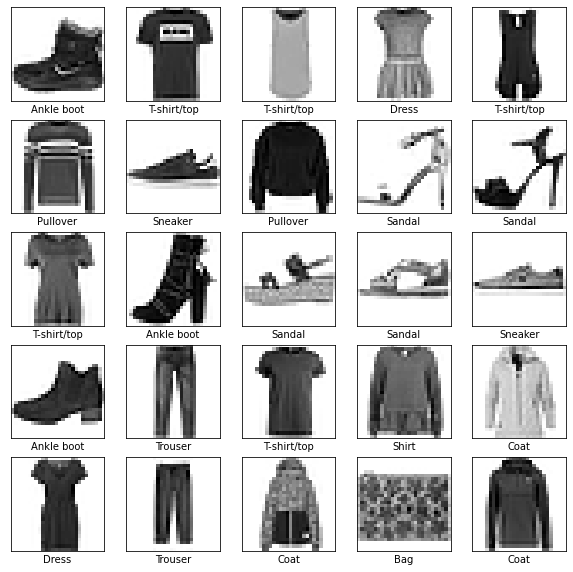

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Simple Sequential Model V1

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

Lets start with a traditional network: single hidden layer, sigmoid activation functions, and SGD as optimizer

In [9]:
model1 = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='sigmoid'),
    Dense(10)
])

In [10]:
numberOfEpochs = 25

In [11]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='sgd',
               metrics=['accuracy'])

In [12]:
h = model1.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6290 - accuracy: 0.5760 - val_loss: 1.2319 - val_accuracy: 0.7146
Epoch 2/25
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0675 - accuracy: 0.7203 - val_loss: 0.9387 - val_accuracy: 0.7338
Epoch 3/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.8680 - accuracy: 0.7441 - val_loss: 0.8005 - val_accuracy: 0.7539
Epoch 4/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.7627 - accuracy: 0.7600 - val_loss: 0.7233 - val_accuracy: 0.7656
Epoch 5/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6979 - accuracy: 0.7722 - val_loss: 0.6686 - val_accuracy: 0.7768
Epoch 6/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6529 - accuracy: 0.7831 - val_loss: 0.6306 - val_accuracy: 0.7900
Epoch 7/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6188 - accuracy: 0.7929 - val_loss: 0.6013 - val_accuracy:

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Lets observe the performance of the network:

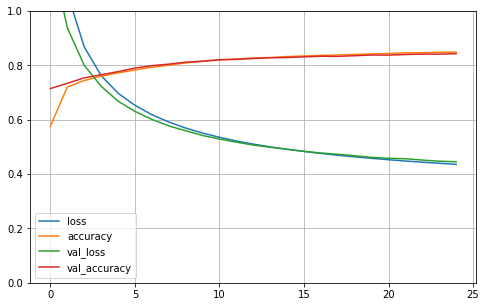

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [16]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [17]:
def show_example_prediction(i, predictions):
  print('Probability of output neurons for first test data:\n', predictions[i])
  print()

  print('Neuron having maximum probability (prediction) is ', np.argmax(predictions[i]), ' and corresponding label is ', class_names[np.argmax(predictions[i])])
  print('True label index ', y_test[i], ' and corresponding label is ', class_names[y_test[i]])
  print()

  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  y_test)
  plt.show()

In [18]:
def show_15_predictions(predictions):
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], y_test, X_test)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], y_test)
    plt.tight_layout()
    plt.show()    

Probability of output neurons for first test data:
 [-3.2646313 -3.3016167 -1.891526  -1.5020679 -2.2521157  3.3259406
 -1.499949   4.07049    1.2107756  4.860854 ]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



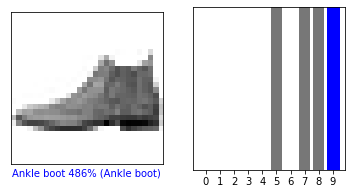

In [19]:
predictions = model1.predict(X_test)

show_example_prediction(0, predictions)

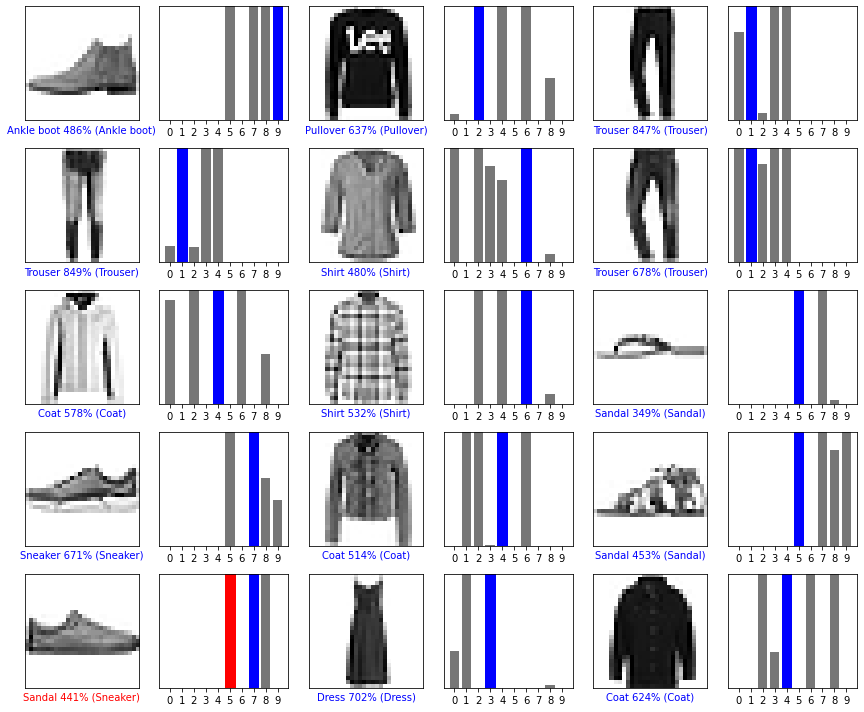

In [20]:
show_15_predictions(predictions)

In [21]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8306000232696533


Please write your comments for the model v1

<b>Comments </b>: Model V1 uses sigmoid function as an activation function at hidden layer although sigmoid function has a vanishing gradient problem. In sigmoid function, if derivative of loss function approaches 0, that network is hard do train. Another problem is: at output layer, Model V1 uses linear activation function (Dense(10) uses linear activation --> Dense(10, 'softmax') uses softmax activation). It can be useful for regression problem but not classification. It doesn't produce probabilistic values which are restricted in range between 0 and 1. Generally, softmax is used at output layer of models based on mutli-categorical classification problems. Softmax is also compatible with SparseCategoricalCrossentropy. Another significant problem is using Stochastic Gradient as an optimizer. It makes a very small progress in each epoch. Its learning rate is 0.01 (uses default learning rate in keras because it isn't specified). After 25 iterations, it has still quite a large error. Finally, using SparseCategoricalCrossentropy is a good choice since it saves memory space.

# Simple Sequential Model V2

In [22]:
model2 = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='relu'),
    Dense(10)
])

In [23]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='Adam',              
               metrics=['accuracy'])

In [24]:
h = model2.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5867 - accuracy: 0.8018 - val_loss: 0.4576 - val_accuracy: 0.8374
Epoch 2/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4273 - accuracy: 0.8502 - val_loss: 0.4179 - val_accuracy: 0.8540
Epoch 3/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3915 - accuracy: 0.8617 - val_loss: 0.4088 - val_accuracy: 0.8547
Epoch 4/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3647 - accuracy: 0.8712 - val_loss: 0.3779 - val_accuracy: 0.8656
Epoch 5/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3489 - accuracy: 0.8754 - val_loss: 0.3892 - val_accuracy: 0.8624
Epoch 6/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3357 - accuracy: 0.8798 - val_loss: 0.3565 - val_accuracy: 0.8749
Epoch 7/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3241 - accuracy: 0.8826 - val_loss: 0.3536 - val_accuracy:

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


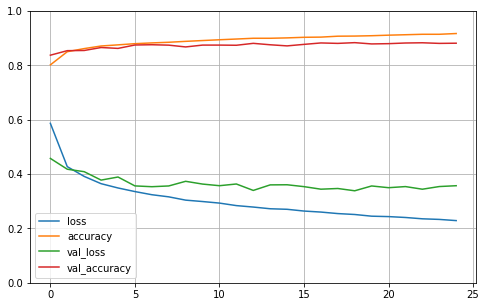

In [26]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first test data:
 [-11.61315    -12.335341   -13.857236   -17.642853    -9.523987
  -3.6176999  -11.579108     0.96963906  -6.490891     6.322058  ]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



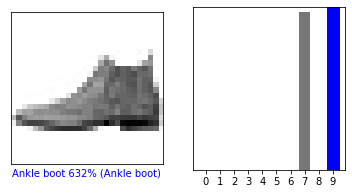

In [27]:
predictions = model2.predict(X_test)

show_example_prediction(0, predictions)

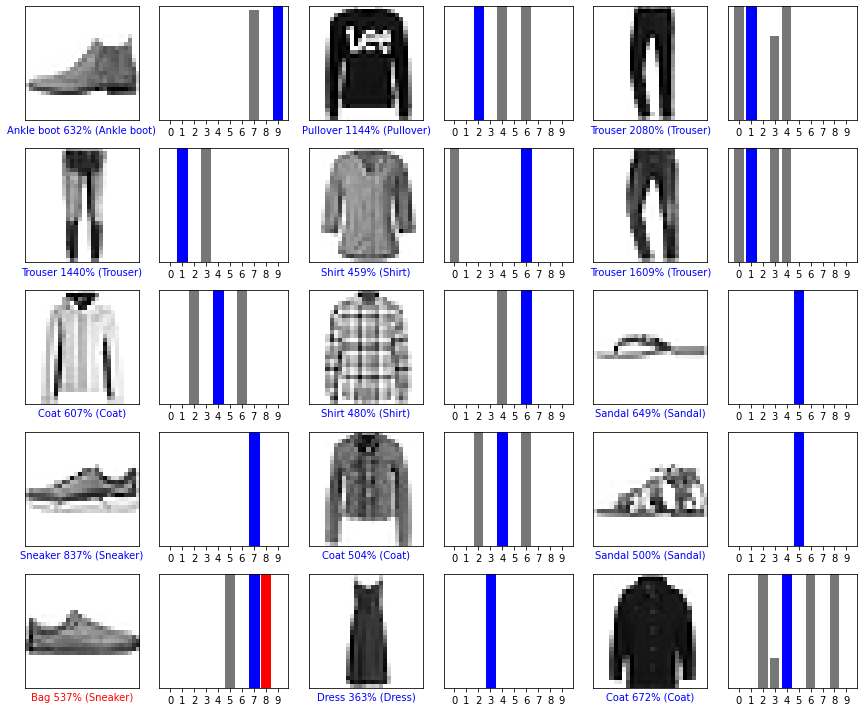

In [28]:
show_15_predictions(predictions)

In [29]:
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8733000159263611


Please write your comments for the model v2

<b>Comments </b>: Model V2 uses ReLU activation function which results in better but still has a vanishing gradient problem at left side of the function (dying ReLU). Model V1 stil uses linear activation function (as default). It is not a good choice for classification problem as explained for Model V1. Differently, it uses Adam as an optimizer. Adam creates an optimization method by combining the best features of the AdaGrad and RMSProp methods and it is much more better than Stochastic Gradient Descent (SGD). Validation accuracy rapidly increases and validation loss rapidly decreases. As I observe, the most important case at this model that it has an overfitting problem. Train accuracy still increases by time but validation accuracy is decreasing after some point.

# Simple Sequential Model V3

In [30]:
model3 = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10)
])

In [31]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='Adam',              
               metrics=['accuracy'])

In [32]:
h = model3.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5723 - accuracy: 0.7970 - val_loss: 0.4377 - val_accuracy: 0.8464
Epoch 2/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4082 - accuracy: 0.8525 - val_loss: 0.3873 - val_accuracy: 0.8633
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3684 - accuracy: 0.8660 - val_loss: 0.3778 - val_accuracy: 0.8665
Epoch 4/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3422 - accuracy: 0.8749 - val_loss: 0.3586 - val_accuracy: 0.8730
Epoch 5/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3205 - accuracy: 0.8820 - val_loss: 0.3452 - val_accuracy: 0.8752
Epoch 6/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3058 - accuracy: 0.8874 - val_loss: 0.4034 - val_accuracy: 0.8541
Epoch 7/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2934 - accuracy: 0.8917 - val_loss: 0.3392 - val_accuracy:

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


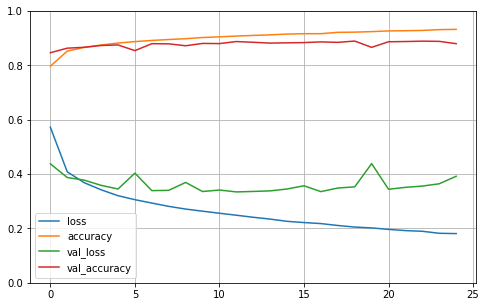

In [34]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first test data:
 [-11.487621  -10.810348   -8.151026  -15.033188   -9.278251   -0.8371406
  -8.38        3.9553916  -9.086393   11.0035095]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



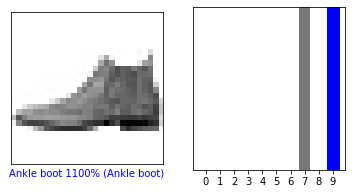

In [35]:
predictions = model3.predict(X_test)

show_example_prediction(0, predictions)

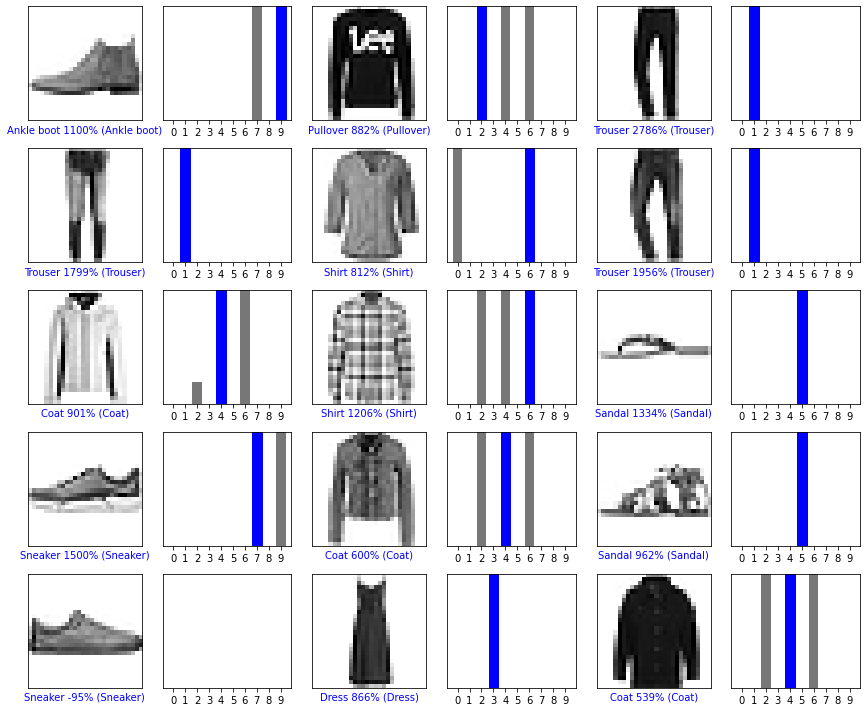

In [36]:
show_15_predictions(predictions)

In [37]:
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8711000084877014


Please write your comments for the model v3

<b>Comments </b>: Model V2 has an overfitting problem, but this time more remarkable problem (and easier to notice). This is expeced since Model V2 contains one more hidden layer; thus, incrased model complexity and flexibility in learning (which may cause over-fiting easier). Training accuracy is still increasing but validation accuracy is decreasing by time after some early point of training. Distinctively, another hidden layer is added with 64 neuron. That increase in the complexity of model may cause overfitting problem thus model memorized training set instead of learning. Besides, the output values of prediciton don't have a good characteristics they are not converged. There is a disorder in between produced prediction values because of linear activation function used at the output layer. Also it still has dying ReLU problem.

# CNN Model

In [38]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [39]:
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPool2D, Dropout

Create CNN_model, compile it, train it, and test it. Finally write comments on your CNN model.

In [40]:
CNN_model = tf.keras.Sequential([
    # Convolution Layers
    Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

# One can use Functional approach to develop more sophisticated architecture for slightly higher performance

In [41]:
CNN_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [42]:
import timeit

%time h = CNN_model.fit(X_train, y_train, epochs=numberOfEpochs, batch_size=128, shuffle=True, validation_data=(X_valid, y_valid))

Epoch 1/25


C:\Users\Semih\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 81s 257ms/step - loss: 0.5728 - accuracy: 0.7921 - val_loss: 0.3501 - val_accuracy: 0.8702
Epoch 2/25
313/313 [==============================] - 80s 256ms/step - loss: 0.3449 - accuracy: 0.8738 - val_loss: 0.2763 - val_accuracy: 0.8973
Epoch 3/25
313/313 [==============================] - 81s 260ms/step - loss: 0.2882 - accuracy: 0.8954 - val_loss: 0.2552 - val_accuracy: 0.9060
Epoch 4/25
313/313 [==============================] - 80s 257ms/step - loss: 0.2532 - accuracy: 0.9071 - val_loss: 0.2504 - val_accuracy: 0.9051
Epoch 5/25
313/313 [==============================] - 81s 257ms/step - loss: 0.2317 - accuracy: 0.9135 - val_loss: 0.2173 - val_accuracy: 0.9188
Epoch 6/25
313/313 [==============================] - 80s 257ms/step - loss: 0.2110 - accuracy: 0.9230 - val_loss: 0.2125 - val_accuracy: 0.9227
Epoch 7/25
313/313 [==============================] - 80s 257ms/step - loss: 0.2006 - accuracy: 0.9269 - val_loss: 0.2067 - val_accuracy: 0.9

In [43]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

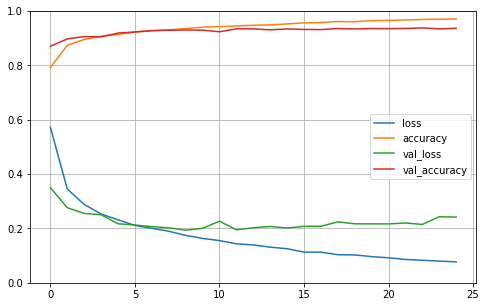

In [44]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first test data:
 [2.4758887e-18 1.0651554e-17 3.3604427e-18 3.1323622e-17 1.1177354e-16
 2.4332270e-13 3.7914273e-19 7.7067297e-10 8.7323710e-17 1.0000000e+00]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



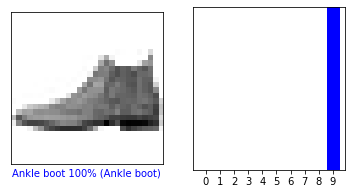

In [45]:
predictions = CNN_model.predict(X_test)

show_example_prediction(0, predictions)

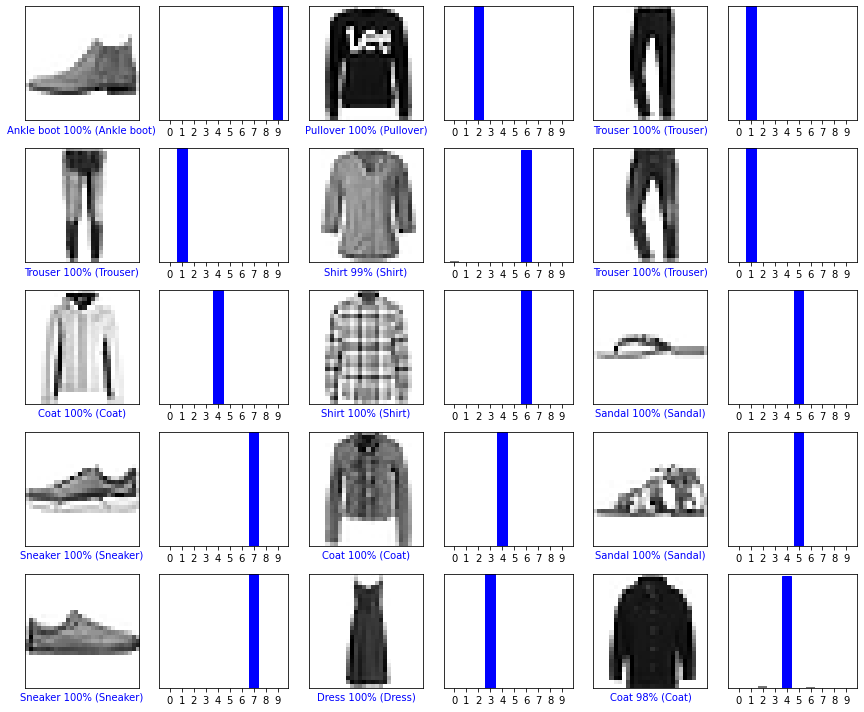

In [46]:
show_15_predictions(predictions)

In [47]:
test_loss, test_acc = CNN_model.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.9298999905586243


Please write your comments for the CNN Model

<b>Comments </b>: 
Model properties:
2 convolution layers
2 million parameters

L1: Conv2d with 32 filter size and 5x5 kernel size
L2: Maxpooling(2) which downsample by 2
L3: Dropout random neurons be 0.3 rate
L4: Conv layer of 64 filters and 3x3 Kernal
L5: Downsampling by 2
L6: Dropout random neurons by 0.3 rate
Flatten the data and classify the output in the dense layer with softmax
Compile the model with adam optimizer
Fit it with 256 batch sizes and 25 epochs

Prediction accuracy: %93

The sneaker and coats are classified wrong in most models.
There is only one true label that predicted with maximum probability. Ex: Sneaker is classified wrong as sandals.

This model is best of the other models above.